In [16]:
import numpy as np
import pandas as pd

In [17]:
df = pd.read_csv("Dry_Bean_Dataset.csv")
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [18]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,
                                                    random_state =0)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(13611, 16)
(9527, 16)
(4084, 16)


In [20]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [21]:
# tree.plot_tree(clf)

Accuracy Score        :  0.8983839373163565
Classification Report : 
               precision    recall  f1-score   support

    BARBUNYA       0.88      0.90      0.89       389
      BOMBAY       1.00      0.99      0.99       134
        CALI       0.92      0.91      0.92       501
    DERMASON       0.90      0.90      0.90      1057
       HOROZ       0.93      0.93      0.93       594
       SEKER       0.92      0.92      0.92       579
        SIRA       0.84      0.84      0.84       830

    accuracy                           0.90      4084
   macro avg       0.91      0.91      0.91      4084
weighted avg       0.90      0.90      0.90      4084



<Axes: >

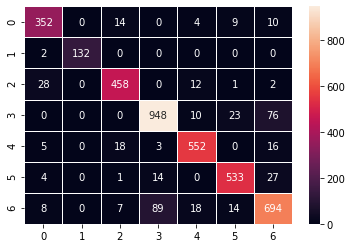

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print("Accuracy Score        : ",accuracy_score(y_test, y_pred))
print("Classification Report : \n", classification_report(y_test, y_pred))
cfm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)

In [23]:
from sklearn.metrics import precision_score, recall_score
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')

precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')

print("Micro Precision:", precision_micro)
print("Micro Recall:", recall_micro)

print("Macro Precision:", precision_macro)
print("Macro Recall:", recall_macro)

Micro Precision: 0.8983839373163565
Micro Recall: 0.8983839373163565
Macro Precision: 0.9125238719685207
Macro Recall: 0.9124283919192163


In [24]:
# K folds cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state=2, shuffle = True)

In [25]:
from sklearn. model_selection import cross_val_score
from numpy import mean, std
modelTree = tree.DecisionTreeClassifier()
scores = cross_val_score(modelTree,X_test, y_test, scoring="accuracy", cv=kf, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.890 (0.006)


In [26]:
# fine tune parameters for lr model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ["best", "random"],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [i for i in range(1,5)]
} 


clf = tree.DecisionTreeClassifier()
gs_svm_result = GridSearchCV(clf, param_grid,cv=kf).fit(X_test, y_test)
# print(gs_svm_result.best_score_)

/Users/steph/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/steph/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/steph/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/steph/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/steph/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test pa

In [27]:
test = gs_svm_result.best_estimator_.score(X_test, y_test)
gs_svm_result.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'best'}

In [31]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=4, min_samples_split=2, splitter='best')
clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

Accuracy Score        :  0.9123408423114594
Classification Report : 
               precision    recall  f1-score   support

    BARBUNYA       0.92      0.89      0.91       389
      BOMBAY       1.00      1.00      1.00       134
        CALI       0.93      0.92      0.92       501
    DERMASON       0.89      0.93      0.91      1057
       HOROZ       0.94      0.95      0.95       594
       SEKER       0.95      0.92      0.94       579
        SIRA       0.87      0.84      0.86       830

    accuracy                           0.91      4084
   macro avg       0.93      0.92      0.93      4084
weighted avg       0.91      0.91      0.91      4084



<Axes: >

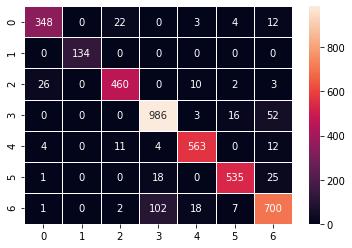

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print("Accuracy Score        : ",accuracy_score(y_test, y_pred))
print("Classification Report : \n", classification_report(y_test, y_pred))
cfm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)

In [30]:
from sklearn.metrics import precision_score, recall_score
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')

precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')

print("Micro Precision:", precision_micro)
print("Micro Recall:", recall_micro)

print("Macro Precision:", precision_macro)
print("Macro Recall:", recall_macro)

Micro Precision: 0.9003428011753183
Micro Recall: 0.9003428011753183
Macro Precision: 0.9121849981460137
Macro Recall: 0.9056478635048199
